LIMPIEZA DE DATOS PROYECTO BI

Incluir paquetes

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from sklearn.impute import SimpleImputer

Cargar data

In [2]:
data = pd.read_csv('./Data/NoProcesada/Relacional/asistencia_corrupta.csv', sep=',', encoding='utf-8')

MUESTRA DE DATOS

In [3]:
data.head()

,idAsistencia,id_sede_clase,id_alumno,columna_vacia
0,NaN,2423.0,1.0,NaN
1,NaN,10975.0,2.0,NaN
2,5643.0,15204.0,2.0,NaN
3,7624.0,13800.0,3.0,NaN
4,NaN,77360.39090657055,3.0,NaN


Verificar estructura

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   idAsistencia   19103 non-null  object 
 1   id_sede_clase  19131 non-null  object 
 2   id_alumno      19004 non-null  float64
 3   columna_vacia  2100 non-null   object 
dtypes: float64(1), object(3)
memory usage: 656.4+ KB


Estadisticas

In [5]:
data.describe()

,id_alumno
count,19004.000000
mean,11991.610024
std,17095.747987
min,1.000000
25%,4244.750000
50%,8521.500000
75%,12691.000000
max,80342.244637


Estadisticas de campos categoricos

In [6]:
obj_cols = data.select_dtypes(include=['O']).columns
if len(obj_cols) > 0:
	display(data.describe(include=['O']))
else:
	print("No object (categorical) columns in the dataframe.")

,idAsistencia,id_sede_clase,columna_vacia
count,19103,19131,2100
unique,16247,10066,1
top,error,error,valor
freq,1048,1047,2100


Visualizar el tamaño del dataset

In [7]:
data.shape

(21000, 4)

Cambiar tipos de datos

In [8]:
# data['id_sede_clase'] = data['id_sede_clase'].astype('category')
# data['id_alumno'] = data['id_alumno'].astype('category')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   idAsistencia   19103 non-null  object 
 1   id_sede_clase  19131 non-null  object 
 2   id_alumno      19004 non-null  float64
 3   columna_vacia  2100 non-null   object 
dtypes: float64(1), object(3)
memory usage: 656.4+ KB


,idAsistencia,id_sede_clase,id_alumno,columna_vacia
0,NaN,2423.0,1.0,NaN
1,NaN,10975.0,2.0,NaN
2,5643.0,15204.0,2.0,NaN
3,7624.0,13800.0,3.0,NaN
4,NaN,77360.39090657055,3.0,NaN


OUTLIERS - Modo Grafico

C:\Users\ji-la\AppData\Local\Temp\ipykernel_9168\2956398687.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data[col] = pd.to_numeric(data[col], errors='ignore')


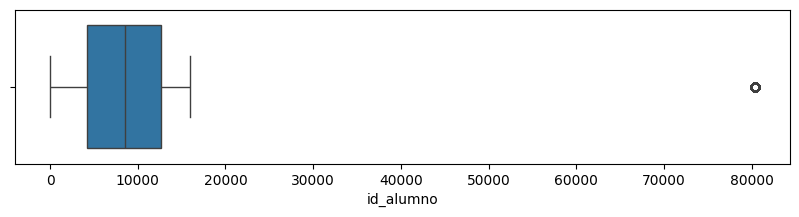

In [9]:
for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='ignore')
    
cols=data.select_dtypes(include=['number']).columns

for col in cols:
    plt.figure(figsize=(10,2))
    sns.boxplot(data=data[cols], x=col)

OUTLIERS - Calculado

IRQ = Rango Intercuartirico

In [10]:
outliers={}

for col in cols:
  Q1 = np.percentile(data[col], 25)
  Q3 = np.percentile(data[col], 75)
  IRQ = Q3 - Q1
  LI = Q1 - 1.5 * IRQ
  LS = Q3 + 1.5 * IRQ
  outliers[col] = data[(data[col] < LI) | (data[col] > LS)][col]

  print(f'{col}: {len(outliers[col])} outliers')

id_alumno: 0 outliers


In [11]:
data.mean
data.std

<bound method DataFrame.std of       idAsistencia      id_sede_clase  id_alumno columna_vacia
0              NaN             2423.0        1.0           NaN
1              NaN            10975.0        2.0           NaN
2           5643.0            15204.0        2.0           NaN
3           7624.0            13800.0        3.0           NaN
4              NaN  77360.39090657055        3.0           NaN
...            ...                ...        ...           ...
20995       7422.0                NaN     1282.0           NaN
20996       4759.0             4792.0        NaN           NaN
20997       4882.0              error        NaN           NaN
20998      10324.0             3259.0       25.0           NaN
20999       8008.0             8925.0    10984.0           NaN

[21000 rows x 4 columns]>

<Axes: xlabel='id_alumno', ylabel='Count'>

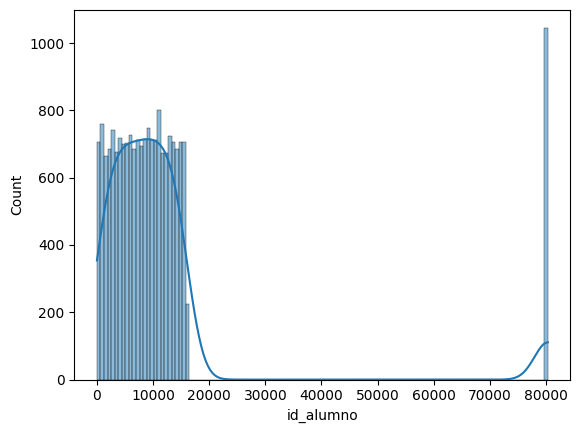

In [12]:
sns.histplot(data=data, x='id_alumno', kde=True)

In [13]:
# data.isna().sum()
# isna, traer valores nulos
data.isna().mean()*100

idAsistencia      9.033333
id_sede_clase     8.900000
id_alumno         9.504762
columna_vacia    90.000000
dtype: float64

Eliminar valores nulos

In [14]:
#axis   1 columna,  0 fila
data.drop('id_alumno', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   idAsistencia   19103 non-null  object
 1   id_sede_clase  19131 non-null  object
 2   columna_vacia  2100 non-null   object
dtypes: object(3)
memory usage: 492.3+ KB


Imputar datos

In [15]:
impute = SimpleImputer(strategy='median')
print ('Mediana incial:' , data['id_alumno'].median())
salida = impute.fit_transform(data[['id_alumno']])
salida = pd.DataFrame(salida)
print('\n Nulos en los nuevos datos', salida.isna().sum())
print('\n  Mediana nuevo datos', salida.median())


KeyError: 'id_alumno'

In [ ]:
impute = SimpleImputer(strategy='constant', fill_value='$')
print ('Recuento incial:' , data['Embarked'].value_counts())
salida = impute.fit_transform(data[['Embarked']])
salida = pd.DataFrame(salida)
print('\n Nulos en los nuevos datos', salida.isna().sum())
print('\n  Recuento nuevo datos', salida.value_counts())


KeyError: 'id_alumno'